In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/hertie_papers.csv")
df.head()

,id,doi,title,publication_year,abstract,authors
0,https://openalex.org/W3110437710,https://doi.org/10.1016/s0140-6736(20)32290-x,The 2020 report of The Lancet Countdown on hea...,2021,"Translations For the Chinese, French, German, ...","Nick Watts, Markus Amann, Nigel W. Arnell, Son..."
1,https://openalex.org/W2195453830,https://doi.org/10.1038/nclimate2870,Biophysical and economic limits to negative CO...,2015,Scenario analyses suggest that negative emissi...,"Pete Smith, Steven J. Davis, Felix Creutzig, S..."
2,https://openalex.org/W2987568643,https://doi.org/10.1016/s0140-6736(19)32596-6,The 2019 report of The Lancet Countdown on hea...,2019,"The Lancet Countdown is an international, mult...","Nick Watts, Markus Amann, Nigel W. Arnell, Son..."
3,https://openalex.org/W2092902022,https://doi.org/10.1016/j.riob.2014.09.001,The governance of social enterprises: Mission ...,2014,We examine the challenges of governance facing...,"Alnoor Ebrahim, Julie Battilana, Johanna Mair"
4,https://openalex.org/W2041842081,https://doi.org/10.1111/1468-0386.00031,From Intergovernmental Bargaining to Deliberat...,1997,Abstract: This article argues that the irresis...,"Christian Joerges, Jürgen Neyer"


In [3]:
for i, row in df[df["abstract"].astype(str).str.contains("topic model")].iterrows():
    print(row["title"])
    print(row["authors"])
    print(row["abstract"])
    print()

Fast growing research on negative emissions
Jan C. Minx, William F. Lamb, Max Callaghan, Lutz Bornmann, Sabine Fuss
Generating negative emissions by removing carbon dioxide from the atmosphere is a key requirement for limiting global warming to well below 2 °C, or even 1.5 and therefore achieving long-term climate goals of recent Paris Agreement. Despite being relatively young topic, emission technologies (NETs) have attracted growing attention in change research over last decade. A sizeable body evidence on NETs has accumulated across different fields that today too large diverse be comprehensively tracked individuals. Yet, understanding size, composition thematic structure this literature corpus crucial pre-condition effective scientific assessments as, example, required new special report °C Intergovernmental Panel Climate Change (IPCC). In paper we use scientometric methods topic modelling identify characterize available as recorded Web Science. We find development started later th

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

texts = [
    "Cats, elephants, camels",
    "Hawks doves pigeons",
    "Cats pigeons"
]
vec = CountVectorizer()
dfmat = vec.fit_transform(texts)
dfmat


<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

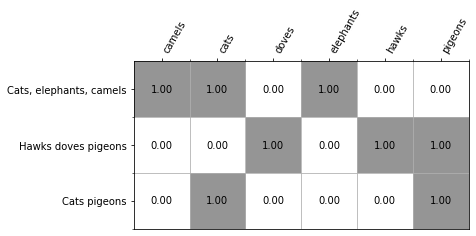

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

def plot_heatmap(X, xlabs, ylabs):
    # Plot a heatmap of the dfm
    fig, ax = plt.subplots()
    ax.imshow(
        X,
        cmap = "Greys",
        norm = Normalize(vmin=0, vmax=X.max()*2)
    )

    # Create a grid using minor ticks
    ax.set_xticks(np.arange(X.shape[1])+0.5, minor=True)
    ax.set_yticks(np.arange(X.shape[0])+0.5, minor=True)
    ax.grid(which="minor", zorder=5)

    # Set up x labels
    ax.xaxis.tick_top()
    ax.set_xticks(np.arange(X.shape[1]))
    ax.set_xticklabels(xlabs, rotation=60, ha="left", va="bottom")

    # Set up y labels
    ax.set_yticks(range(len(ylabs)))
    ax.set_yticklabels(ylabs)

    # Put the numbers in
    for m in range(X.shape[0]):
        for n in range(X.shape[1]):
            ax.text(n, m, f"{X[m, n]:.2f}", ha="center", va="center")

V = dfmat.todense()
plot_heatmap(V, vec.get_feature_names_out(), texts)
plt.savefig("plots/V.pdf", bbox_inches="tight")

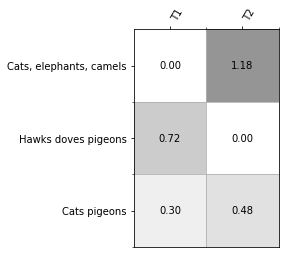

In [9]:
from sklearn.decomposition import NMF
nmf = NMF(2)
W = nmf.fit_transform(dfmat)

plot_heatmap(W, ["T1","T2"], texts)
plt.savefig("plots/W.pdf", bbox_inches="tight")

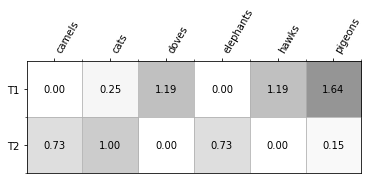

In [12]:
H = nmf.components_
plot_heatmap(H, vec.get_feature_names_out(),["T1","T2"])
plt.savefig("plots/H.pdf", bbox_inches="tight")

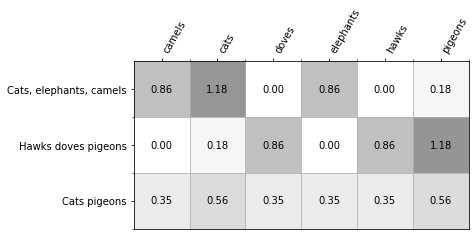

In [14]:
WH = W.dot(H)
plot_heatmap(WH, vec.get_feature_names_out(), texts)
plt.savefig("plots/WH.pdf", bbox_inches="tight")

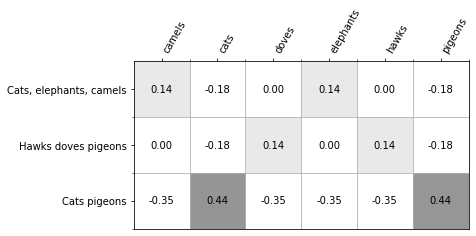

In [16]:
error = V - WH
plot_heatmap(error, vec.get_feature_names_out(), texts)
plt.savefig("plots/error.pdf", bbox_inches="tight")

In [17]:
df.head()

,id,doi,title,publication_year,abstract,authors
0,https://openalex.org/W3110437710,https://doi.org/10.1016/s0140-6736(20)32290-x,The 2020 report of The Lancet Countdown on hea...,2021,"Translations For the Chinese, French, German, ...","Nick Watts, Markus Amann, Nigel W. Arnell, Son..."
1,https://openalex.org/W2195453830,https://doi.org/10.1038/nclimate2870,Biophysical and economic limits to negative CO...,2015,Scenario analyses suggest that negative emissi...,"Pete Smith, Steven J. Davis, Felix Creutzig, S..."
2,https://openalex.org/W2987568643,https://doi.org/10.1016/s0140-6736(19)32596-6,The 2019 report of The Lancet Countdown on hea...,2019,"The Lancet Countdown is an international, mult...","Nick Watts, Markus Amann, Nigel W. Arnell, Son..."
3,https://openalex.org/W2092902022,https://doi.org/10.1016/j.riob.2014.09.001,The governance of social enterprises: Mission ...,2014,We examine the challenges of governance facing...,"Alnoor Ebrahim, Julie Battilana, Johanna Mair"
4,https://openalex.org/W2041842081,https://doi.org/10.1111/1468-0386.00031,From Intergovernmental Bargaining to Deliberat...,1997,Abstract: This article argues that the irresis...,"Christian Joerges, Jürgen Neyer"


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words="english")
df = df.dropna(subset=["abstract"])
dfmat = vec.fit_transform(df.abstract)
nmf = NMF(15)
W = nmf.fit_transform(dfmat)


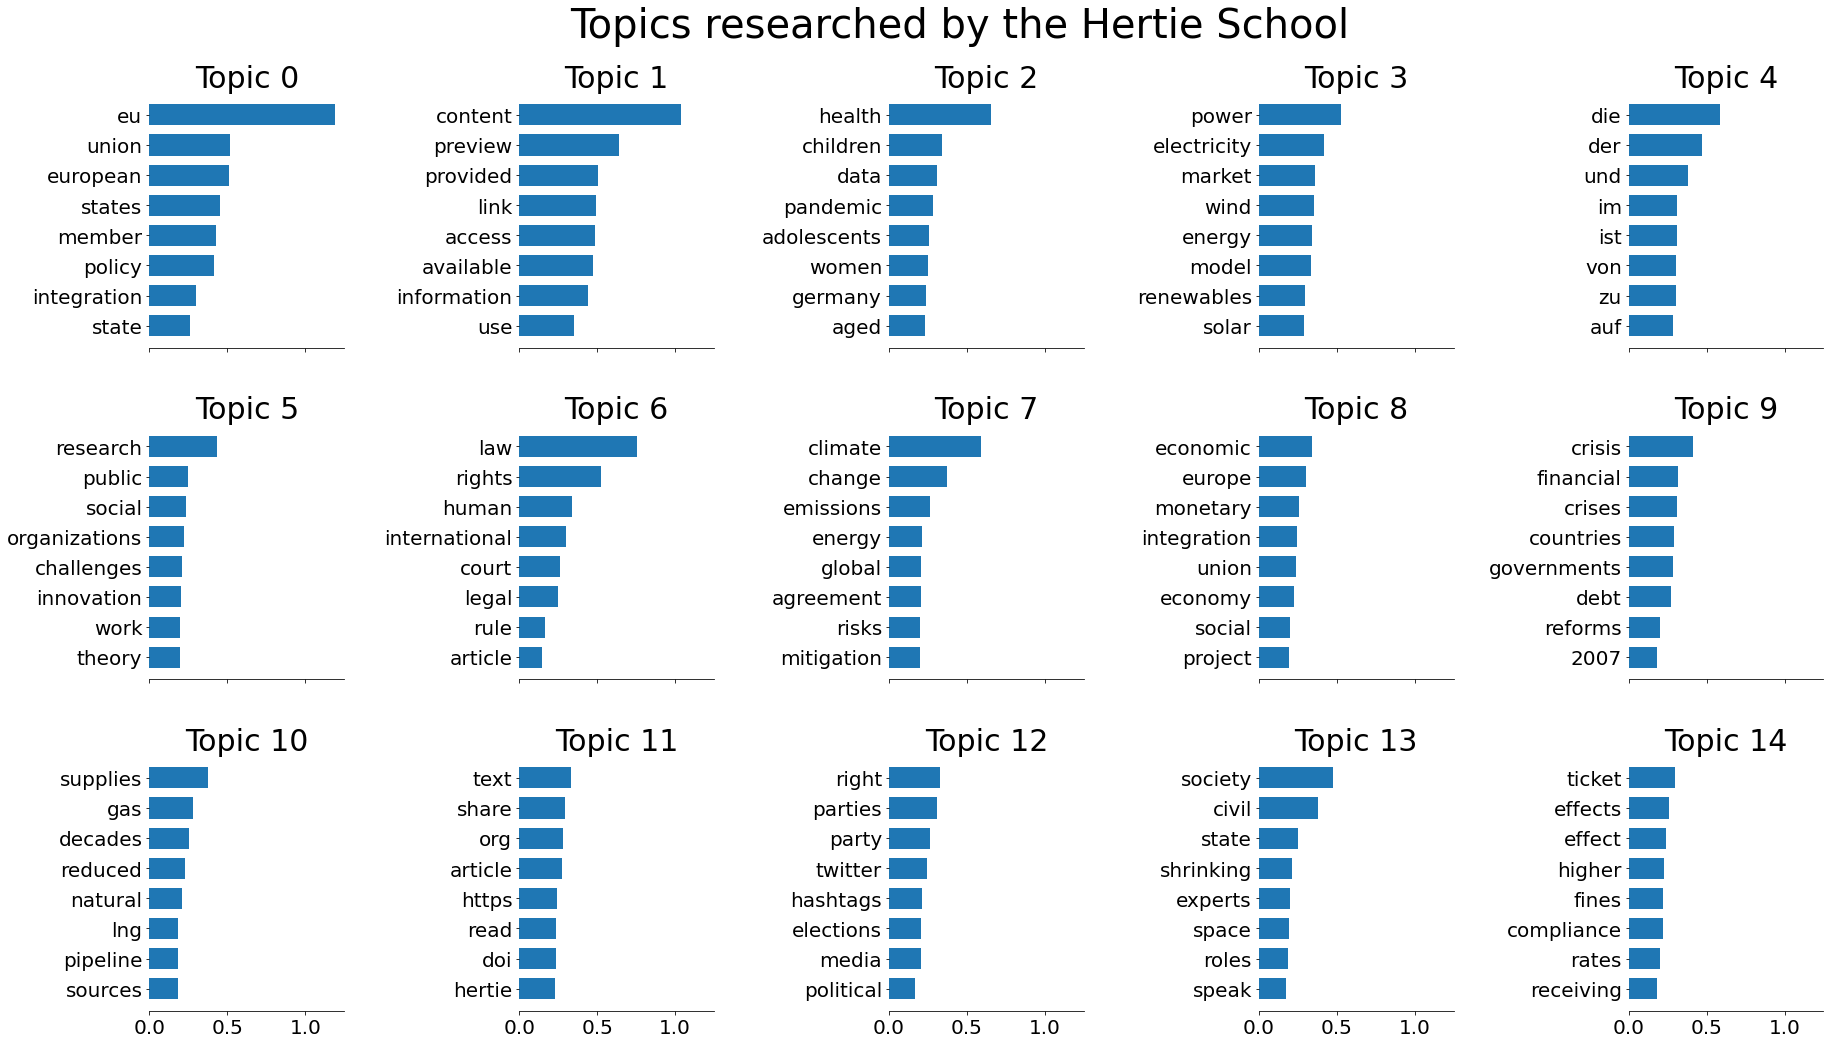

In [19]:
# Here's a function to plot the results of a topic model, it returns a list of titles which are simply the top 3 words of each topic 

def plot_top_words(model, feature_names, n_top_words, title):
    n_components = model.n_components_
    fig, axes = plt.subplots(n_components//5,5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    t_titles = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
        
        t_titles.append(", ".join(top_features[:3]))

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
    return t_titles

t_titles = plot_top_words(nmf, vec.get_feature_names_out(), 8, "Topics researched by the Hertie School", )

(1231, 15)


/home/max/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


(1231, 2)


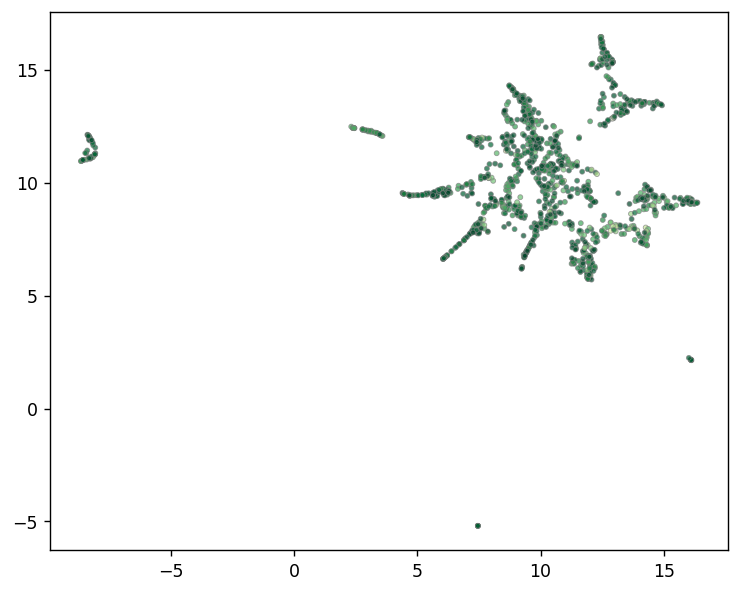

In [20]:

import umap
print(W.shape)
reducer = umap.UMAP()
embedding = reducer.fit_transform(W)
print(embedding.shape)
fig, ax = plt.subplots(figsize=(7,5.7),dpi=125)

ax.scatter(
    embedding[:,0], embedding[:,1], 
    c=df.publication_year, cmap='YlGn', 
    alpha=0.7, s=8,
    lw=0.5, ec="grey"
)

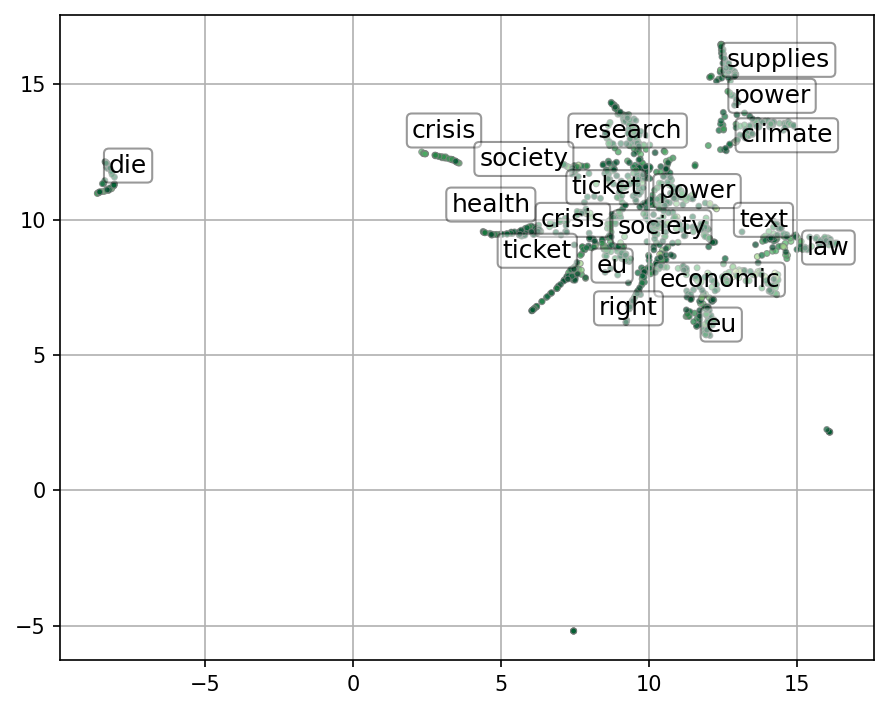

In [21]:
# Now we want to plot this, add topic labels, and use some other aspect of the data to decide the colour of the points

# We import a couple more libraries
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull
import mpld3
from adjustText import adjust_text

# Initiate a figure object
fig, ax = plt.subplots(figsize=(7,5.7),dpi=150)

# Make a scatter plot with the dimensions of the embedding as X and Y arguments, and the publication year as the colour
scatter = ax.scatter(
    embedding[:,0], embedding[:,1], 
    c=df.publication_year, cmap='YlGn', 
    alpha=0.7, s=8,
    lw=0.5, ec="grey"
)

# This function takes a set of points associated with a given topic label, and adds that label in the center of each cluster of points that are found
def cluster_label_points(
    title, points, ax, eps,
    min_cluster, clabel_size,
    ):
    
    # cluster the points and get the cluster numbers of the points
    db = DBSCAN(eps=eps,min_samples=min_cluster).fit(points)
    labels = db.labels_
    texts = []
    
    # For each cluster number
    for l in set(labels):
        # ignore the -1 cluster which is the remainder which cannot be clustered
        if l==-1:
            continue
        
        # get the indices of the points which have this cluster label
        ind = np.argwhere(labels==l).ravel()
        # The label points are those points with those indices
        lpoints = points[ind]
        # As long as the cluster is bigger than the min_cluster parameter, add a label
        if len(ind) > min_cluster:
            # Get the smallest shape that can be drawn around the point
            hull = ConvexHull(lpoints)
            # Get the center of that shape
            cx = np.mean(hull.points[hull.vertices,0])
            cy = np.mean(hull.points[hull.vertices,1])
            c = [cx,cy]
            # Get a short form of the title (just the first term)
            title = title.split(",")[0].replace("{","")
            # Add the label to the plot
            text = ax.annotate(
                title, c, fontsize=clabel_size,
                ha="center",va="center",
                bbox={'facecolor':"white", 'alpha':0.4, 'pad':0.2, 'boxstyle': 'round'}

            )
            texts.append(text)
    return texts
            
# Set a couple of parameters for the plotting
min_cluster = 15
# eps is a parameter for dbscan: the maximum distance between two samples for them to be considered part of the same neighbourhood
eps = 1
# The font size for the cluster label
clabel_size = 12
# The quantile of doctopic scores for documents to be considered part of a topic
t_thresh = 0.8

# start an empty list of labels, so we can run adjust_text to prevent them overlapping
texts = []

# for each topic
for t_index, title in enumerate(t_titles):
    # Get the nonzero topic scores
    scores = W[:,t_index][W[:,t_index].nonzero()]
    # then get the threshold from those scores given the quantile parameter set above 
    thresh = np.quantile(scores, t_thresh)
    # Get the indices of the documents above that threshold
    highlight_docs = np.argwhere(W[:,t_index]>thresh).ravel()
    # Get the points with those indices
    points = embedding[highlight_docs]
    # label the topic using the function defined above
    texts += cluster_label_points(
        title,
        points,
        ax,
        eps,
        min_cluster,
        clabel_size
    )
    
# Adjust the texts to prevent overlap
adjust_text(texts,ax=ax, arrowprops=dict(arrowstyle="->", color='None', lw=0.5))

    
# add gridlines  
ax.grid(linestyle='-')

In [17]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10
from bokeh.models import Label, LabelSet

output_notebook()

Loading BokehJS ...

In [18]:
df["x"] = embedding[:,0]
df["y"] = embedding[:,1]

In [19]:
label_df = pd.DataFrame([t.xy + [t._text] for t in texts])
label_df.columns = ["x","y","label"]
label_df

,x,y,label
0,15.382212,6.290302,organizations
1,12.819968,7.323730,organizations
2,-4.990240,9.991469,die
3,13.510512,12.218363,law
4,11.094094,0.294234,power
5,13.648464,3.700303,power
6,11.592908,7.021010,power
7,10.174052,4.454965,health
8,11.159925,8.202300,data
9,14.217020,4.052943,climate


In [20]:
datasource = ColumnDataSource(df)
labelsource = ColumnDataSource(label_df)
plot_figure = figure(
    title='UMAP projection of Hertie research',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(
    tooltips="<span>@title</span>"
))


plot_figure.circle(
    'x',
    'y',
    source=datasource,
    #fill_color=dict(field='party', transform=color_mapping),
    line_color="grey",
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
labels = LabelSet(
    x='x', y='y', text='label',
    source=labelsource
)
plot_figure.add_layout(labels)


show(plot_figure)

In [21]:
author_df = pd.read_csv("../datasets/hertie_authors.csv")
inst = "Mercator Research Institute on Global Commons and Climate Change"
inst_authors = author_df[author_df["institution_display_name"]==inst]

df["MCC"] = np.where(df["id"].isin(inst_authors.id),1,0)

In [22]:
df_W = pd.DataFrame(W)
df_W = df_W / df_W.sum(axis=1)
df_W.head()

,0,1,2,3,4,5,6,7,8,9,...,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114
0,0.000000,0.0,0.000000,0.266507,0.000000,0.0,1.124205,0.117582,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.138168,0.0,0.178330,0.000000,0.000000,0.0,0.000000,0.082916,0.240238,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.397712,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.183424,0.0,0.458303,0.000000,0.000000,0.0,0.000000,0.000000,0.191248,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.434578,0.0,0.000000,0.000000,0.014381,0.0,0.000000,0.000000,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

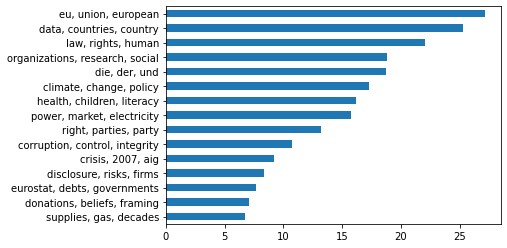

In [23]:
total_sums = W.sum(axis=0)
fig, ax = plt.subplots()

df_W = pd.DataFrame(W)
df_W.columns = t_titles
df_W.sum(axis=0).sort_values().plot.barh()